# MultiLayer Perceptron (MLP) neural networks

ML Laboratory 03

# 1. Objective

Students should understand and be able use a multi-layer fully-connected
networks in Matlab

# 2. Theoretical aspects

Multi-layer perceptron (fully-connected) neural networks are widely used
for classificaton of small, simple datasets.

## 2.1 Multilayer perceptron

### Cascading neurons

Logistic regression = 1 neuron

A single neuron creates a single hyperplane and separates the input
space in two categories 0 or 1)

-   **“neuron”** = one logistic regression operation
-   **“hyperplane”** = a linear boundary surface, with dimension N-1
-   with a smooth sigmoid transition zone between the two classes

What if we have a dataset as follows? How to do classification here?

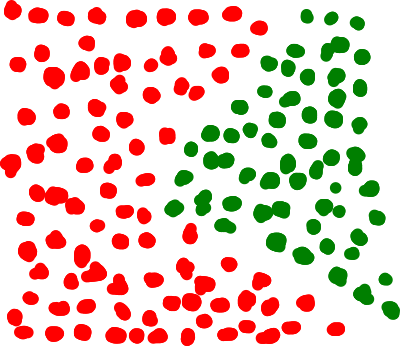

Solution: use **two neurons**:

-   each one draws a hyperplane (a line)
-   aggregate their results into the final outcome: “When both neurons
    say 1, output class is 1. Otherwise, output class is 0”.

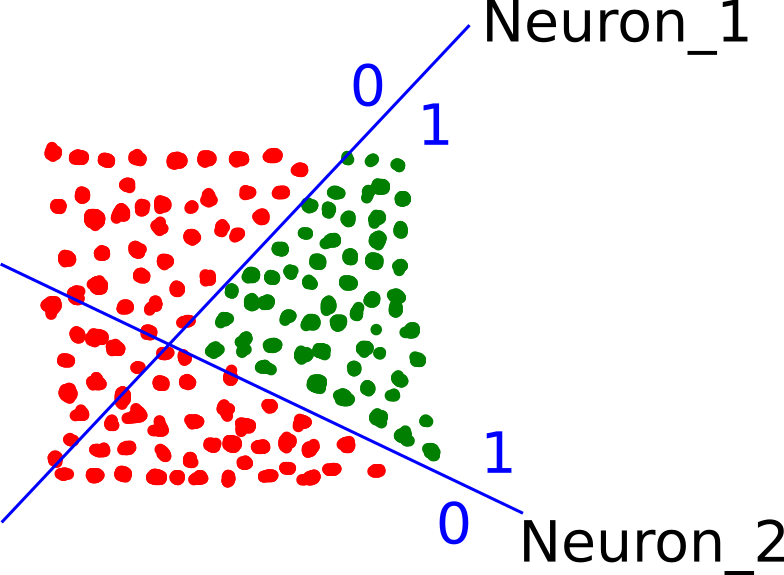

Combining the results of both neurons in the final result is **also done
with a (third) neuron**. Thus, we have **cascading neurons**.

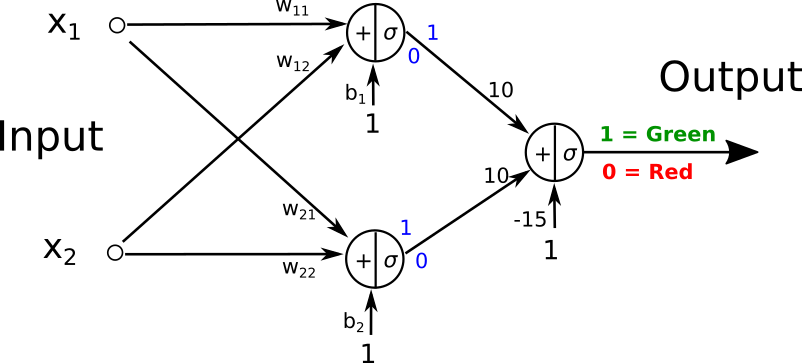

Neurons operating on the same inputs form a **layer**. We have two
layers now:

-   The inputs (this does not contain neurons, just the inputs, but it
    is commonly named “the input layer”)
-   The hidden layer (middle)
-   The output layer (the output neuron)

What if we want a boundary composed of 3 sides? Use three neurons in the
hidden layer.

What if we want a curved boundary? Use many more neurons (approximate
the curve from many lines)

**Any hypersurface** can be obtained with just two layers, provided
there are enough neurons in the hidden layer:

1.  The hidden layer draws some hyperplanes (e.g. lines)
2.  The output layer combines the results into output values

### Multiple outputs

What if we have 4 output classes?

Have 4 neurons in the output layer, one for each class. When the input
belongs to class $k$, the $k$-th neuron should produce 1, and all the
others should produce 0.

**One-hot encoding**: When we train the network, we need to tell it what
is the desired output (target). This is known as **encoding**. For an
input of class $k$, we tell the network to produce a vector with a
single value of 1, on position $k$.
$$\begin{bmatrix} 0 \\ \vdots \\ 0 \\ 1 \\ 0 \\ \vdots \end{bmatrix}$$

After training, when running the model, we look at **the location** of
the highest value and the location is the predicted class.

### Multiple layers

We can actually have more than 2 layers in a network. We can have as
many as we want! Interpretation:

-   first hidden layer draws some hyperplanes
-   next layer combines hyperplanes into some simpler shapes
-   next layer combines the simple shapes into more complex shapes
-   ….
-   final layer gives the output

In practice, it is often better to have **more layers with fewer
neurons** than 2 layers but with a huge hidden layer.

However, training many layers and many neurons is **difficult**, i.e. it
can overfit, become unstable, etc.

### Matrix form

**One neuron** does a linear combination of the inputs, followed by
activation function:
$$\begin{bmatrix} w_1 & x_w & \dots & w_N & b \end{bmatrix} \cdot \begin{bmatrix} x_1 \\ x_2 \\ \vdots \\ x_N \\ 1 \end{bmatrix} = z 
\rightarrow a$$

**A layer of $M$ neurons is just $M$ neurons next to each other**:
$$\begin{bmatrix} 
w_{11} & w_{12} & \dots & w_{1N} & b_1 \\
w_{21} & w_{22} & \dots & w_{2N} & b_2 \\
\vdots  & \vdots & \dots & \vdots & \vdots \\
w_{M1} & w_{M2} & \dots & w_{MN} & b_M \\
\end{bmatrix} \cdot \begin{bmatrix} x_1 \\ x_2 \\ \vdots \\ x_N \\ 1 \end{bmatrix} = 
\begin{bmatrix} 
z_1 \\ z_2 \\ \dots \\ z_M
\end{bmatrix}
\rightarrow 
\begin{bmatrix} 
a_1 \\ a_2 \\ \dots \\ a_M
\end{bmatrix}$$

Each layer is characterized by the weight matrix $W$.

The whole network can be understood as a sequence of matrix
multiplications and activation functions.

**The next layer** takes as inputs the outputs $a_i$ of the previos
layer, and does the same.

## 2.2 The model

The multi-layer perceptron model contains $L$ layers, each layer
consisting of a matrix multiplication and activation function:

$$\begin{aligned}
z^{1} =& W^{1} \cdot X \\
a^{1} =& activation(z^{1}) \\
\\
z^{2} =& W^{2} \cdot a^{1} \\
a^{2} =& activation(z^{2}) \\ 
... \\
z^{k} =& W^{k} \cdot a^{k-1} \\
a^{k} =& activation(z^{k})\\
\end{aligned}$$

Here, $W^{k}$ is a matrix and $z{k}$, $a{k}$ are vectors (columns).

The activation function can be the **sigmoid**, **ReLU**, **tanh** etc.
Typically the output used sigmoid, but all others are up to the
designer.

-   sigmoid activation function:
    $$f(z) = \sigma(z) = \frac{1}{1 + e^{-z}} = \frac{e^z}{e^z + 1}$$

-   ReLU (“Rectified Linear Unit”):
    $$f(z) = \begin{cases} z &, \textrm{ if } z \geq 0 \\ 0 &,  \textrm{ if } z < 0  \end{cases}$$

-   Hyperbolic tangent:

    …

**Inputs**:

-   a matrix $X$ with every input vector being a column (according to
    the equations below; we can also transpose all matrices and vectors,
    if we want).

**Outputs** (assuming one-hot encoding):

-   a vector $\hat{y}$ which should be understood as scores/probability
    of belonging in each class
-   the **location of the maximum** value gives the predicted class

## 2.3 The model parameters

The model parameters are the weight matrices $W^{k}$ of every layer. The
element $w^{k}_{ij}$ is the weight in the $k$-th layer, $i$-th neuron,
$j$-th input of it.

Every neuron has a bias input. We presume that the bias is included in
the weight matrices, like we did until now (e.g. like a fake input equal
to 1 is appended to the input of every layer).

## 2.4 The cost function

For classification, the **cross-entropy** loss function is typically
used. For a single input, whose output is a vector
$\hat{y} = [\hat{y}_1, ... \hat{y}_N]$ and the true output should have
been $y = [y_1, ... y_N]$, the cross-entropy function is defined as:

$$L(y, \hat{y}) = - y_1 \log_2{\hat{y_1}} - \dots - y_n \log_2{\hat{y_n}} = -\log_2{\hat{y_{class}}},$$

where $\hat{y_{class}}$ is the model’s predicted probability for the
true class of the input. Note that we assume that the true output is
one-hot encoded, i.e. the vector $y$ has a single value of 1 and all the
others are 0.

For several inputs (a “batch”), do the average of all losses:
$$J = \frac{1}{N} \sum_i L(y^i, \hat{y}^i)$$

## 2.5 Training

Training is done with **backpropagation** and gradient descent (or some
variant of it).

**Backpropagation** = the technique to compute the derivatives of $J$
with respect to all parameters in the network.

### Backpropagation

Assume we have a network with 4 layers.

$$\begin{aligned}
z^{1} =& W^{1} \cdot X \\
a^{1} =& activation(z^{1}) \\
\\
z^{2} =& W^{2} \cdot a^{1} \\
a^{2} =& activation(z^{2}) \\
\\ 
z^{3} =& W^{3} \cdot a^{2} \\
a^{3} =& activation(z^{3}) \\
\\ 
z^{4} =& W^{4} \cdot a^{3} \\
a^{4} =& activation(z^{4})
\end{aligned}$$

The final results $a^{4}$ are the outputs $a^{4} = \hat{y}$.

Just like in logistic regression, we can compute the derivatives for the
final layer, $\frac{dJ}{dW^{4}}$ and $\frac{dJ}{da^3}$

For the third layer, we compute its own derivatives,
$\frac{da^{3}}{dW^{3}}$ and $\frac{da^{3}}{da^2}$. Together with the
$\frac{dJ}{da^3}$ received as inputs from the above layer, we have:

$$\frac{dJ}{dW^{3}} = \frac{dJ}{da^3} \cdot \frac{da^{3}}{dW^{3}}$$ and
$$\frac{dJ}{da^{2}} = \frac{dJ}{da^3} \cdot \frac{da^{3}}{da^{2}}$$

For the second layer, we compute its own derivatives,
$\frac{da^{2}}{dW^{2}}$ and $\frac{da^{2}}{da^1}$. Together with the
$\frac{dJ}{da^2}$ received as inputs from the above layer, we have:

$$\frac{dJ}{dW^{2}} = \frac{dJ}{da^2} \cdot \frac{da^{2}}{dW^{2}}$$ and
$$\frac{dJ}{da^{1}} = \frac{dJ}{da^1} \cdot \frac{da^{2}}{da^{1}}$$

Finally, the input layer computes its own derivatives,
$\frac{da^{1}}{dW^{1}}$, aand together with the $\frac{dJ}{da^{1}}$
received from the layer above, computes:
$$\frac{dJ}{dW^{1}} = \frac{dJ}{da^1} \cdot \frac{da^{1}}{dW^{1}}$$

In backpropagation, **each layer (each operation, really) does the
following**:

1.  Has some inputs I, parameters P, and outputs O.
2.  Knows show to compute its own derivatives $\frac{dO}{dP}$ and
    $\frac{dO}{dI}$
3.  Receives as input from the next layer the quantity $\frac{dJ}{dO}$
4.  Computes $\frac{dJ}{dP} = \frac{dJ}{dO} \cdot \frac{dO}{dP}$. This
    will be used in Gradient Descent.
5.  Computes $\frac{dJ}{dI} = \frac{dJ}{dI} \cdot \frac{dO}{dI}$ and
    passes them back to the preceding layer.

Backpropagation is a **computational graph** (sequence of operations)
not unlike the model itself is just a sequence of operations. The only
difference is that the data travels **backwards**, from the network
output towards its input. The “data” here is the gradients
(derivatives).

Training the model means repeating the two passes:

1.  **Forward pass**: run the model (from the inputs, and current
    parameters, compute the outputs and the cost function)
2.  **Backward pass**: backpropagation + gradient descent (from the cost
    function, compute gradients and update parameters, going backwards
    to the input
3.  Repeat

After the gradients are calculated, we can update the parameters.

**Gradient descent** refers to the typical update rule
$W = W - \mu \frac{dJ}{dW}$. There exist also some smarter variations of
it.

## 2.6 Matlab functions for working with neural networks

### Toy Example setup

Let’s generate some data points belonging in 3 classes, situated around
central points `(2,2)`, `(1,-1)` and `(-1,1)`:

We do **one hot encoding** of the output vector Y. In R2020b we can use
the function `onehotencode()`. In previous versions, we can use the
function `ind2vec()`.

``` matlab
[X,Y] = make_data([2 2;   1 -1;    -1,1]);
Yonehot = onehotencode(categorical(Y),2);
```

### Neural Net tools

-   for **classification**: `nprtool()` (Neural Net Pattern Recognition)
-   for **regression**: `nftool()` (Neural Net Fitting)
-   `nnstart()`: entry-point for both of the above

1.  Open `nprtool` and select input and output data. Outputs must be
    one-hot encoded.

    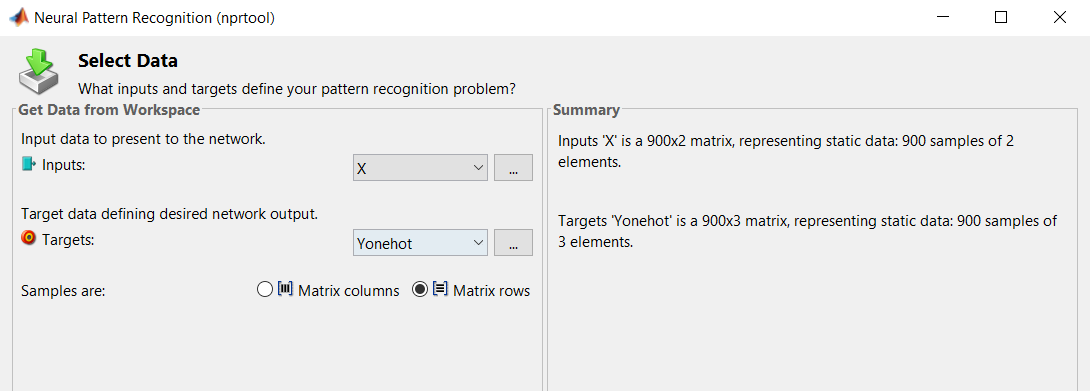

2.  Select Training, Validation and Test set size.

-   The **training set** contains the data used for the actual training.
-   The **validation set** contains the data used to stop the training
    before over-fitting (over-learning). For a fair decision, for
    validation we use data which is not used for actual training.
-   The **testing set** contains the data used for the final testing of
    the final trained model. For a fair result, we use data which the
    network has never seen until now (neither in training nor for
    validation).

Default values for small datasets are around 70% / 15% / 15%. For larger
datasets (tens of thousands of input vectors), we can use smaller
amounts for validation and testing.

These three sets of data are selected **randomly** from the overall
available dataset, for fairness.

1.  Select hidden layer size. Output layer size is determined by the
    number of output classes.

    In general, pick an intermediate value between size of input and
    size of output, so that the network has an overall decreasing size
    towards the output.

    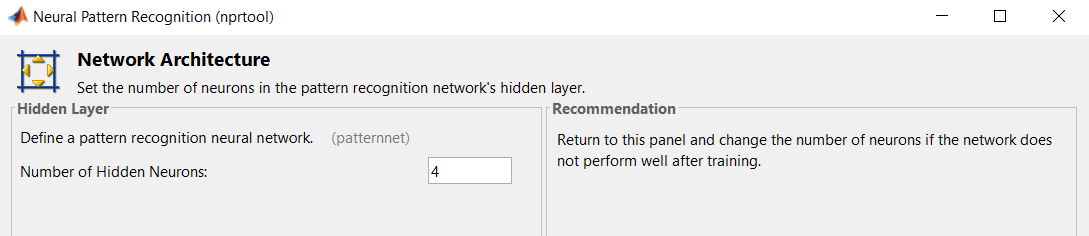

2.  Run Train

3.  Evaluate outputs: Error, Confusion matrix, etc.

    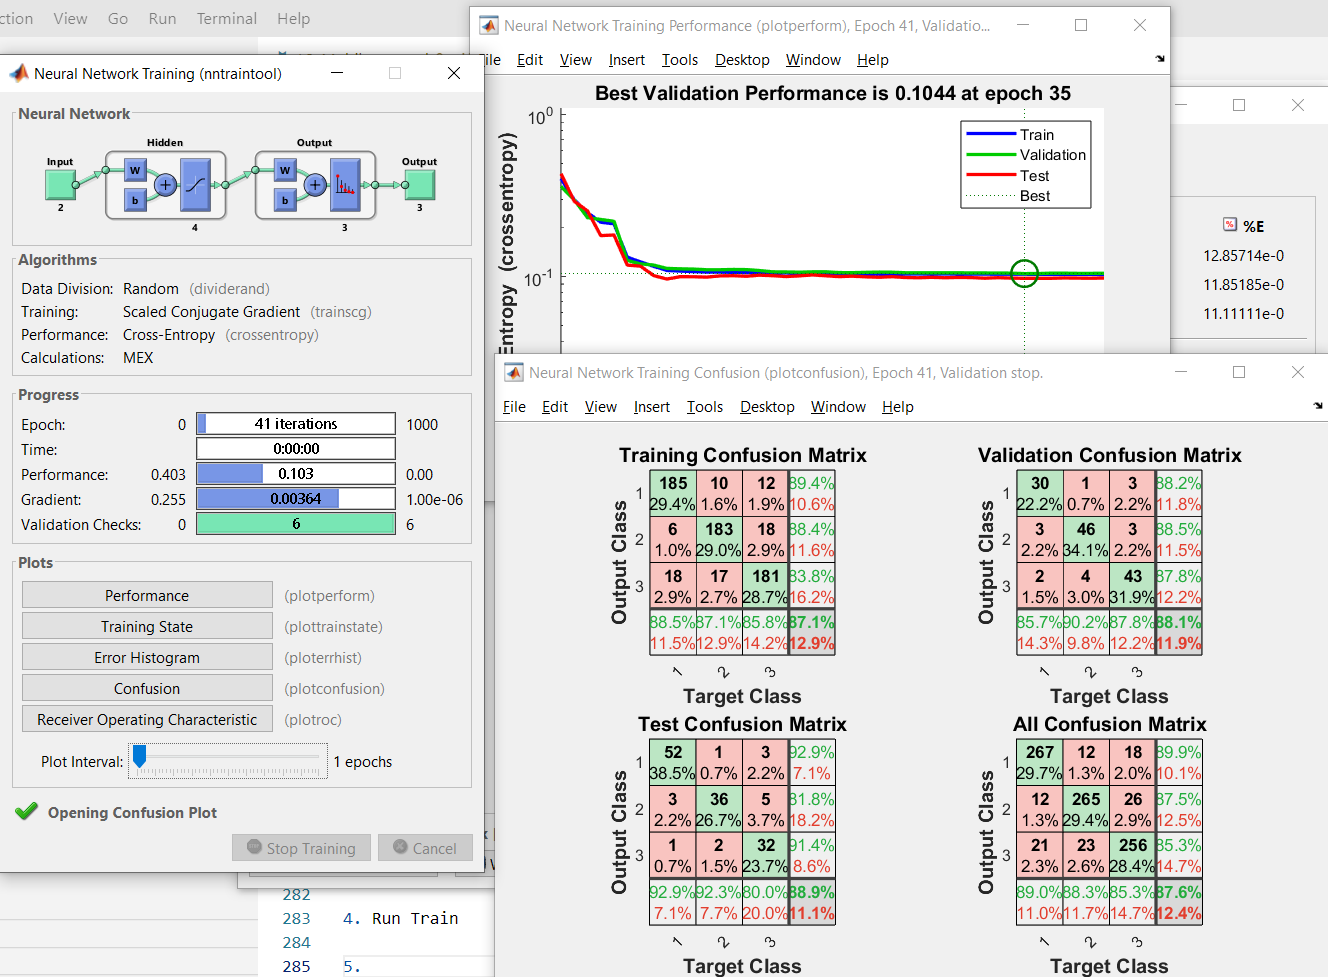

4.  Click Next and deploy the neural network as a Matlab function

    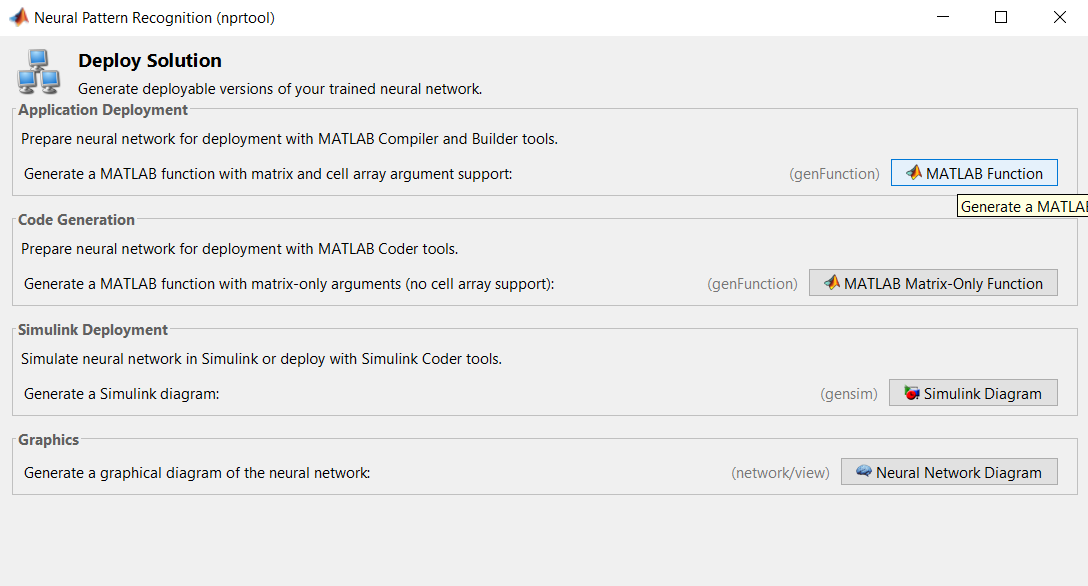

5.  Call the function for a new input. It returns the network output,
    i.e. the score for each class.

    The higher score is the predicted class.

    ``` matlab
    myNeuralNetworkFunction([1,2])


    ans =

     0.8166    0.0117    0.1716   
    ```

### Classification Learner

1.  Use the same Classification Learner tool introduced last time, and
    load the data.

2.  Select a Neural Network classifier.

    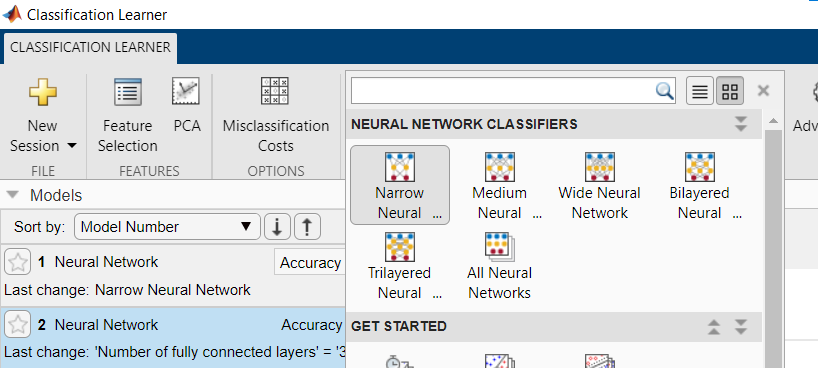

3.  You can select more advanced parameters (number of layers, size of
    layers, type of activation function)

    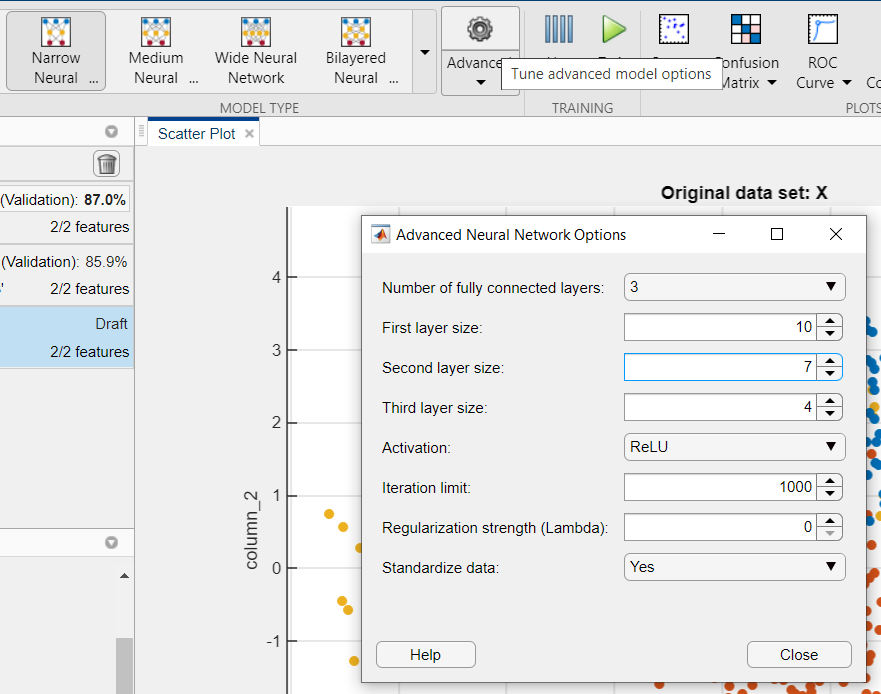

4.  Inspect outputs (e.g. Confusion matrix)

5.  Export model

6.  Call the model’s predict functions:

    ``` matlab
    trainedModel.predictFcn([-1,2])
    ```

### The `patternnet()` function

For more fine-grained control, you can use the `patternnet()` function.
Read its documentation to see more details.

**Note**: All the data vectors should be column vectors.

``` matlab
% Construct a pattern network with two hidden layer of sizes 8 and 4:
net = patternnet([8 4]);

% Train the network net using the training data (outputs are one-hot-encoded). Use the default training algorithm.
net = train(net,X',Yonehot');

% View the trained network.
view(net);

% Predict using the trained network. Pass a column vector!
y = net([-1; -1])    
```

# 3. Practical work

## 3.1 Exercise 0 - Manual calculations

Consider a neural network with the following architecture:

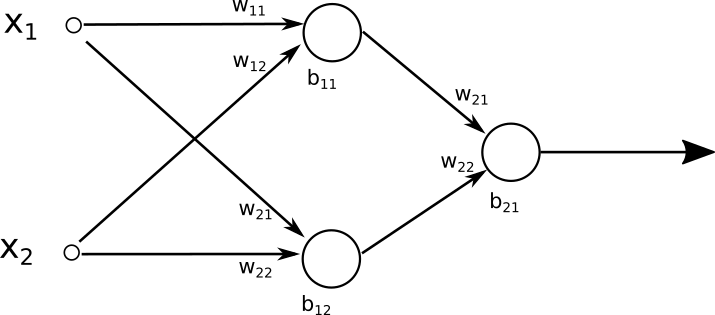

The network parameters are:

-   hidden layer:
    $W^{1} = \begin{bmatrix} 2 & -0.5 \\ -1 & 1.5 \end{bmatrix}$,
    $b^{1} = \begin{bmatrix} 0.25 \\ 0.25\end{bmatrix}$
-   output layer: $W^{2} = \begin{bmatrix} 0.5 & -1 \end{bmatrix}$,
    $b^{2} = 2$

Both the hidden layer and the output layer have sigmoid activation
function.

1.  Compute the network output for the input
    $x = \begin{bmatrix} 0.5 \\ 1 \end{bmatrix}$

2.  Compute the network output for the same input, considering that the
    hidden layer has ReLU activation instead

3.  Compute the cost function (i.e. the loss), assuming the true output
    should have been $y = 0$.

4.  Compute the cost function (i.e. the loss), assuming the true output
    should have been $y = 1$.

## 3.2 Exercise 1 - Wine classification - nprtool

We shall work with the same `wine_dataset` data as in the first labs.
The last column gives the quality score. We shall treat the quality
score as a **class indicator**. We shall perform classification with a
multilayer network model, aiming to classify correctly the quality of a
wine based on its parameters.

1.  Prepare the data

    Load the `wine_dataset` in Matlab, and consider the following:

    -   how many inputs are there?
    -   how many output categories?
    -   how many hidden neurons should we use?

    ``` matlab
    Data = readmatrix('winequality-red.csv');
    X = Data(:,1:11);       % 11 columns for the inputs
    N = size(Data,1);       % The number of wines in the set (1599)
    Y = Data(:,12) ;        % 12th column the quality
    ```

    We do **one hot encoding** of the output vector Y. In R2020b we can
    use the function `onehotencode()`. In previous versions, we can use
    the function `ind2vec()`.

    ``` matlab
    Yenc = full(ind2vec(Y'))
    % Since our data starts from value 3, we shall remove the first two lines. Thus quality 3 = class 1, quality 4 = class 2, etc.
    Yenc = Yenc(3:end, :)' % Remove first two lines
    Yenc = Yenc';          % Transpose, so each value corresponds to a row, just like the input data
    ```

2.  Start the `nprtool()` and train a neural network to predict the wine
    quality.

    Display the following evaluation metrics:

    -   Number of epochs and final error value
    -   Error plot
    -   Confusion matrix
    -   Receiver Operating Characteristic

3.  Go back and change the hidden layer size to 20, 50, then 5. Do the
    results change significantly?

## 3.3 Exercise 2 - Wine classification - Classification Learner

Use the Classification Learner app to train a similar model with two
hidden layers with sizes 9 and 8.

## 3.4 Exercise 3 - Handwritten digit classification on MNIST

We follow the MNIST training tutorial from
<https://www.mathworks.com/matlabcentral/fileexchange/73010-mnist-neural-network-training-and-testing>

1.  Unzip the MNIST data file \``MNISTdata.zip` provided with the lab.

2.  Load the data (this will create the matrix `mnist_train`):

    ``` matlab
    load mnist_train.csv
    ```

    The first column is the digit number. The remaining 748 columns
    contain the pixels in the linearized image (every image has 28x28
    pixels).

    Lookup the MNIST database on the Internet to see how the images look
    like.

3.  Prepare the inputs and outputs. Check the sizes of the resulting
    arrays to understand what they contain.

    ``` matlab
    X = mnist_train(:,2:end);
    Y = mnist_train(:,1);
    Yenc = full(ind2vec(1 + Y'))   % digits are 0 to 9, add 1 so that class indices are 1 to 10 (10 classes)
    Yenc = Yenc';          % Transpose, so each value corresponds to a row, just like the input data
    ```

4.  Use `patternnet()` to design and train a neural network with two
    layers of sizes 80 and 60.

    **Note:** Training a real-life network may take some time. Have
    patience until training is finished.

    You can look a the performance and confusion matrix updating live as
    training progresses.

5.  When training is finished:

    -   Display the error plot. Do you notice the **overfitting**? This
        is what validation is good for.
    -   Display the confusion matrix. What is the classification
        accuracy (percentage of correctly classified images) on the
        testing set?

6.  Load the test file `mnist_test.csv` and predict the class of the
    first data sample. Is the class correct?

7.  Play with parameters. Change the network architecture: use a single
    hidden layer, change the number of neurons, etc. Compare the
    results:

    -   When is the accuracy greater?
    -   When is overfitting more of a problem?

8.  Optional: Use the model to predict the digit from your own
    hand-drawing.

    Draw a digit similar to the ones in the dataset (this amounts to the
    **preprocessing** of the image):

    -   Draw a letter using the mouse, in MS Paint
    -   Make sure the digit is around the center of the image, has the
        same brush width compared to the image as the ones in the
        dataset
    -   Save it as a grayscale image
    -   Resize the image to 28x28 pixels
    -   You should get an image similar to the ones in the dataset

    Read the image in Matlab:

    -   Use `imread()` to load the image
    -   Convert to double with (`double()`)
    -   Linearize the matrix in a row-major order (row by row), e.g.:
        `Ivec = I'(:)`

    Identify (predict) the digit using the network:

        net(Ivec)

    Was the result correct?

# 4. Final questions

1.  How many parameters does the network used for MNIST classification
    have?

2.  How many parameters would have a network used for classifying color
    images with 1024 x 768 resolution, into 10 output classes, using two
    hidden layers of size 2000 and 150?